# Feature matching 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [59]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax  = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [60]:
reeses = cv2.imread('reeses_puffs.jpg',0)

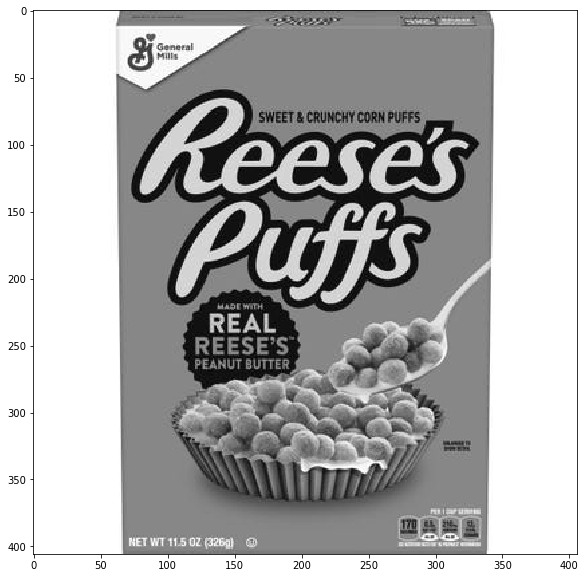

In [61]:
display(reeses)

In [62]:
cereales =cv2.imread('many_cereals.jpg',0)

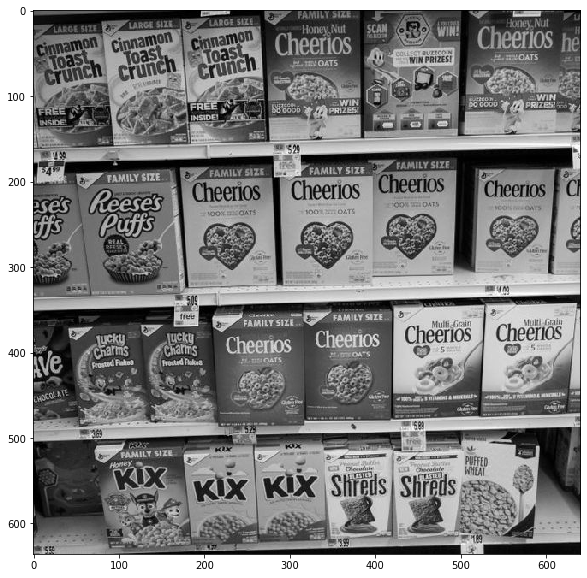

In [63]:
display(cereales)

In [64]:
orb = cv2.ORB_create()

In [65]:
kp1 , des1= orb.detectAndCompute(reeses,None)
kp2 , des2= orb.detectAndCompute(cereales,None)

In [66]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [67]:
matches = bf.match(des1,des2)

In [68]:
single_match  = matches[0]

In [69]:
matches = sorted (matches,key=lambda x:x.distance)

In [70]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereales,kp2,matches[:25],None,flags = 2)

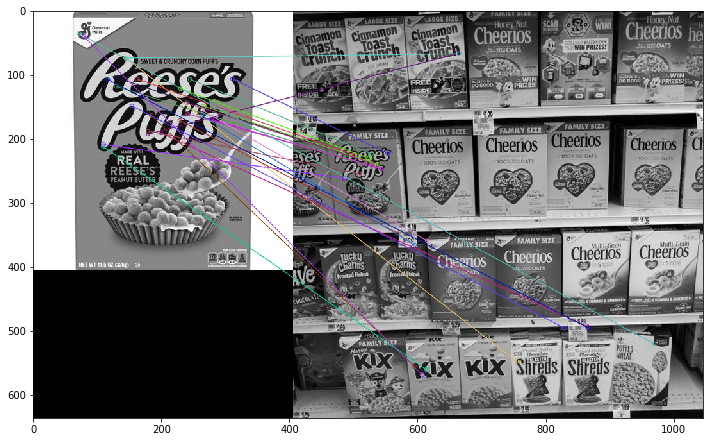

In [71]:
display(reeses_matches)

In [72]:
sift = cv2.xfeatures2d.SIFT_create()

In [73]:
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereales,None)

In [74]:
bf = cv2.BFMatcher()

In [75]:
des1

array([[ 2.,  1.,  2., ...,  1., 26.,  2.],
       [ 0.,  0.,  7., ...,  0.,  1.,  7.],
       [ 0., 17., 15., ...,  0.,  0.,  3.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  2.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  7.]], dtype=float32)

In [76]:
matches = bf.knnMatch(des1,des2,k=2)


In [77]:
matches 

[[<DMatch 0x7fe3ac591f50>, <DMatch 0x7fe3ac593030>],
 [<DMatch 0x7fe3ac589510>, <DMatch 0x7fe3ac4d1b70>],
 [<DMatch 0x7fe3ac4d1c10>, <DMatch 0x7fe3ac4d1c50>],
 [<DMatch 0x7fe3ac4d1830>, <DMatch 0x7fe3ac570570>],
 [<DMatch 0x7fe3ac570210>, <DMatch 0x7fe3ac570350>],
 [<DMatch 0x7fe3ac570c50>, <DMatch 0x7fe3ac570110>],
 [<DMatch 0x7fe3ac570810>, <DMatch 0x7fe3ac5707b0>],
 [<DMatch 0x7fe3ac5704f0>, <DMatch 0x7fe3ac355430>],
 [<DMatch 0x7fe3ac355290>, <DMatch 0x7fe3ac3554d0>],
 [<DMatch 0x7fe3ac3551f0>, <DMatch 0x7fe3ac3552b0>],
 [<DMatch 0x7fe3ac355210>, <DMatch 0x7fe3ac3553b0>],
 [<DMatch 0x7fe3ac355310>, <DMatch 0x7fe3ac355250>],
 [<DMatch 0x7fe3ac3552d0>, <DMatch 0x7fe3ac355630>],
 [<DMatch 0x7fe3ac355690>, <DMatch 0x7fe3ac3556b0>],
 [<DMatch 0x7fe3ac3556f0>, <DMatch 0x7fe3ac3556d0>],
 [<DMatch 0x7fe3ac355510>, <DMatch 0x7fe3ac355670>],
 [<DMatch 0x7fe3ac355450>, <DMatch 0x7fe3ac355650>],
 [<DMatch 0x7fe3ac3555f0>, <DMatch 0x7fe3ac3555d0>],
 [<DMatch 0x7fe3ac3550d0>, <DMatch 0x7fe3ac355

In [78]:
good = []

for match1,match2 in matches :
    if match1.distance <0.75*match2.distance:
        good.append([match1])
    
    

In [79]:
len(good)

115

In [80]:
len(matches)

998

In [81]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereales,kp2,good,None,flags=2)

In [82]:
sift = cv2.xfeatures2d

In [83]:
#FLANN 
FLANN_INDEX_KDTREE = 0
index_params  = dict(algorithm= FLANN_INDEX_KDTREE,trees=5)
search_params = dict(checks=50)

In [84]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [85]:
matches = flann.knnMatch(des1,des2,k=2)

In [86]:
matchesMask = [[0,0] for i in range (len(matches))]

In [87]:
#matchesMask.

In [88]:

for i,(match1 , match2)  in enumerate(matches)  :
    if match1.distance< 0.7 * match2.distance:
        matchesMask[i] = [1,0]

In [89]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask = matchesMask,
                  flags = 0)
 

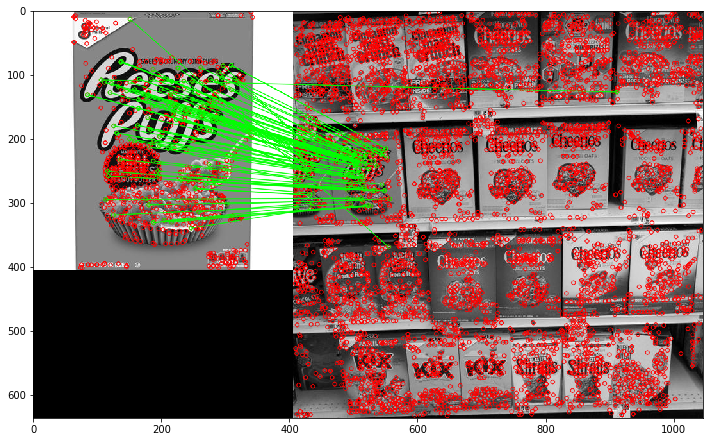

In [58]:
#flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereales,kp2,None,flags=0)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereales,kp2,matches,None,**draw_params)

display(flann_matches)